# Employee Performance and Retention Analysis

## Phase 1 - Data Collection & EDA

### Step 1: Data Collection & Preprocessing

In [11]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Employee_data.csv")
print("Initial shape:", df.shape)
df.head()

Initial shape: (203, 8)


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,E1000,Riley Gupta,58.0,Finance,82921.0,13.0,1.64,Yes
1,E1001,Alex Roy,48.0,Operations,79726.0,3.4,1.75,No
2,E1002,Casey Iyer,34.0,HR,80300.0,14.4,2.14,No
3,E1003,Riley Khan,27.0,HR,52677.0,0.2,1.69,No
4,E1004,Riley Reddy,40.0,Sales,85609.0,14.5,4.59,No


In [12]:
# Handle missing values and duplicates

print("Missing values per column:\n", df.isnull().sum())

# Impute missing values
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['Department'].fillna(df['Department'].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

print("Shape after cleaning:", df.shape)

Missing values per column:
 EmployeeID          0
Name                0
Age                 5
Department          0
Salary              5
YearsAtCompany      0
PerformanceScore    5
Attrition           0
dtype: int64
Shape after cleaning: (200, 8)


C:\Users\komal\AppData\Local\Temp\ipykernel_10888\1538825033.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)
C:\Users\komal\AppData\Local\Temp\ipykernel_10888\1538825033.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### Step 2: Exploratory Data Analysis (EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
df.describe()

,Age,Salary,YearsAtCompany,PerformanceScore
count,195.000000,200.000000,200.000000,195.000000
mean,40.061538,66068.897500,7.451000,2.982410
std,12.228761,20003.577043,4.426542,1.145098
min,20.000000,30412.000000,0.200000,1.020000
25%,28.500000,50009.500000,3.600000,1.925000
50%,42.000000,67009.500000,7.450000,2.990000
75%,51.000000,84040.250000,11.200000,3.985000
max,60.000000,99896.000000,15.000000,4.990000


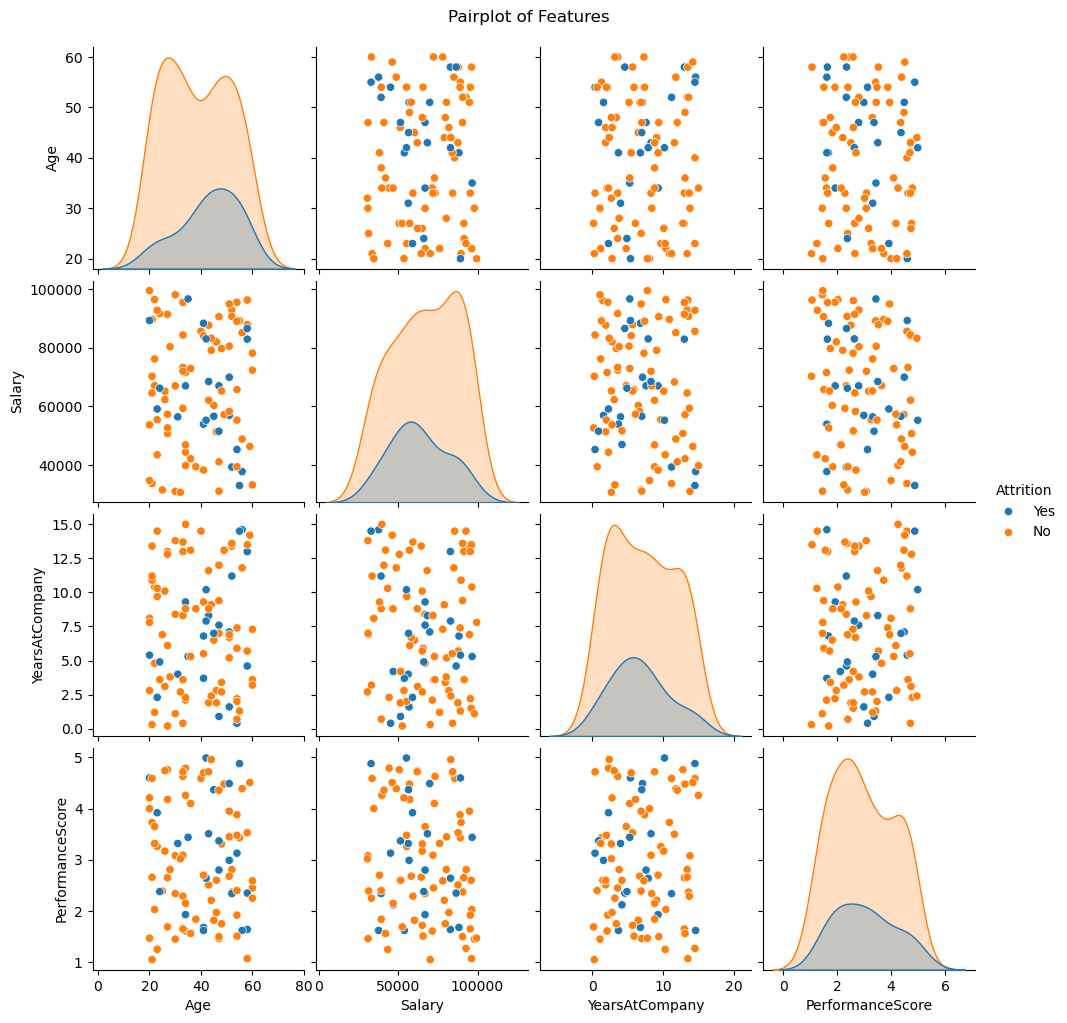

In [14]:
# Pairplot (sample of 100 for speed)
sns.pairplot(df.sample(100), vars=['Age','Salary','YearsAtCompany','PerformanceScore'], hue='Attrition')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

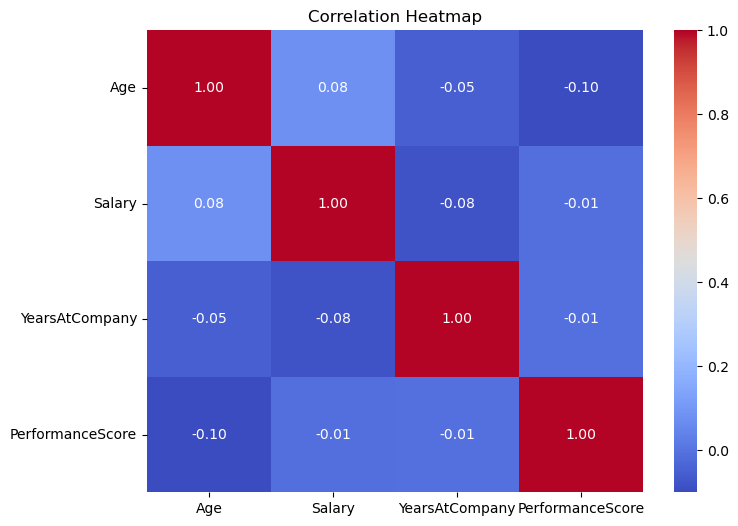

In [15]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Salary','YearsAtCompany','PerformanceScore']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

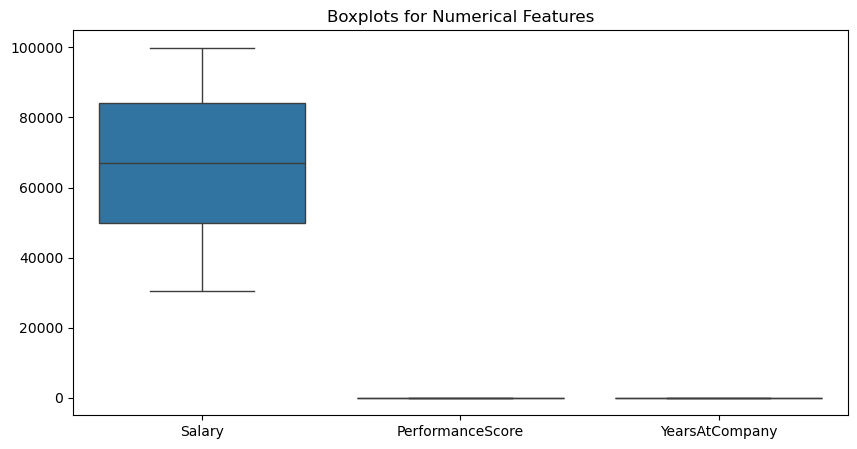

In [16]:
# Boxplots for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Salary','PerformanceScore','YearsAtCompany']])
plt.title("Boxplots for Numerical Features")
plt.show()

### Step 3: Probability & Statistical Analysis

In [17]:
# Probability of attrition by department
dept_attr = df.groupby("Department")['Attrition'].value_counts(normalize=True).unstack().fillna(0)
dept_attr

Attrition,No,Yes
Department,,
Finance,0.617647,0.382353
HR,0.638889,0.361111
IT,0.750000,0.250000
Marketing,0.600000,0.400000
Operations,0.800000,0.200000
R&D,0.896552,0.103448
Sales,0.781250,0.218750


In [18]:
# Bayes' theorem example: P(Attrition=Yes | PerformanceScore<2.5)
low_perf = df['PerformanceScore'] < 2.5
p_attr = (df['Attrition']=='Yes').mean()
p_low = low_perf.mean()
p_low_and_attr = ((df['Attrition']=='Yes') & low_perf).mean()

p_attr_given_low = p_low_and_attr / p_low if p_low > 0 else None
print("P(Attrition='Yes' | Performance<2.5) =", p_attr_given_low)

P(Attrition='Yes' | Performance<2.5) = 0.27397260273972607


In [19]:
# Hypothesis Testing (ANOVA across departments)
import scipy.stats as stats

groups = [grp['PerformanceScore'].values for name, grp in df.groupby('Department')]
fstat, pval = stats.f_oneway(*groups)
print(f"ANOVA F = {fstat:.3f}, p = {pval:.4f}")

ANOVA F = nan, p = nan


## Phase 2 - Predictive Modeling

### Step 4: Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
le_attr = LabelEncoder()
df['Attrition_label'] = le_attr.fit_transform(df['Attrition'])

le_dept = LabelEncoder()
df['Department_label'] = le_dept.fit_transform(df['Department'])

# Scale numerical features
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Age','Salary','YearsAtCompany','PerformanceScore']])
df[['Age_s','Salary_s','YearsAtCompany_s','PerformanceScore_s']] = scaled

df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,Attrition_label,Department_label,Age_s,Salary_s,YearsAtCompany_s,PerformanceScore_s
0,E1000,Riley Gupta,58.0,Finance,82921.0,13.0,1.64,Yes,1,0,1.470683,0.844569,1.256720,-1.175327
1,E1001,Alex Roy,48.0,Operations,79726.0,3.4,1.75,No,0,4,0.650834,0.684446,-0.917458,-1.079019
2,E1002,Casey Iyer,34.0,HR,80300.0,14.4,2.14,No,0,1,-0.496955,0.713213,1.573788,-0.737560
3,E1003,Riley Khan,27.0,HR,52677.0,0.2,1.69,No,0,1,-1.070849,-0.671155,-1.642184,-1.131551
4,E1004,Riley Reddy,40.0,Sales,85609.0,14.5,4.59,No,0,6,-0.005045,0.979282,1.596436,1.407501


### Step 5: Employee Attrition Prediction (Classification)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.00      0.00      0.00        11

    accuracy                           0.60        40
   macro avg       0.34      0.41      0.38        40
weighted avg       0.50      0.60      0.54        40

Accuracy: 0.6


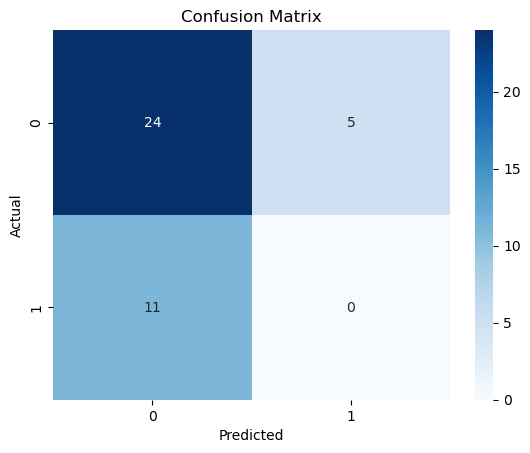

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

X = df[['Age_s','Salary_s','YearsAtCompany_s','PerformanceScore_s','Department_label']]
y = df['Attrition_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Step 6: Employee Performance Prediction (Regression)

R² Score: -0.22311826385054223
MSE: 1.1106653657460979


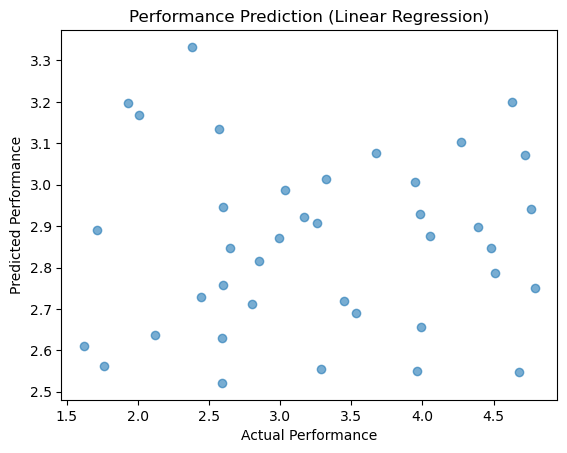

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Select features and target
X_reg = df[['Age','Salary','YearsAtCompany','Department_label']]
y_reg = df['PerformanceScore']

# Impute missing values in X
imputer = SimpleImputer(strategy='median')
X_reg = imputer.fit_transform(X_reg)

# Also drop rows where PerformanceScore is NaN
valid_idx = ~y_reg.isna()
X_reg = X_reg[valid_idx]
y_reg = y_reg[valid_idx]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Performance Prediction (Linear Regression)")
plt.show()

## Phase 3 - Deep Learning

### Step 7: Neural Network for Performance Prediction

C:\Users\komal\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Test MSE: 1.876304030418396


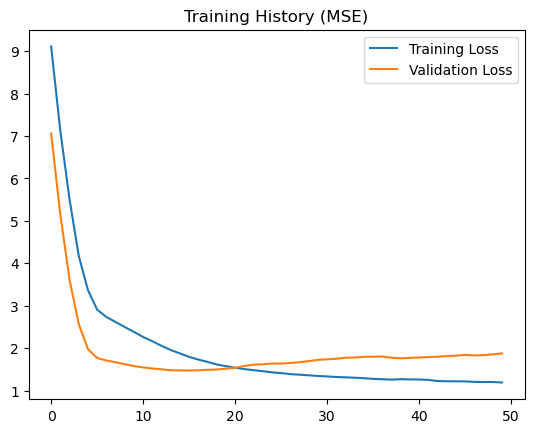

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X_dl = df[['Age_s','Salary_s','YearsAtCompany_s','Department_label']]
y_dl = df['PerformanceScore']

X_train, X_test, y_train, y_test = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=0)

loss, mse = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Test MSE:", mse)

# Plot training history
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Training History (MSE)")
plt.show()

Employee Performance and Retention Analysis – Final Report

Prepared by: Komal Kushwaha
Project Objective: Analyze employee data to predict performance and attrition trends using statistical, machine learning, and deep learning techniques.

1. Introduction

Employee performance and retention are critical factors in organizational success. High attrition leads to recruitment costs, knowledge loss, and reduced productivity, while performance analysis helps optimize workforce allocation. This project uses a sample employee dataset to explore, analyze, and predict:

Employee performance based on features like age, salary, and years at the company.

Employee attrition trends using classification models.

Tools and libraries used include Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and TensorFlow/Keras.

2. Dataset Overview

Columns:

Column	Description
EmployeeID	Unique ID of employee
Name	Employee Name
Age	Employee Age
Department	Department of employee
Salary	Monthly Salary
YearsAtCompany	Number of years in the company
PerformanceScore	Performance rating (1–5)
Attrition	Yes/No indicating if employee left

Total rows: 200

Missing values: Age (5), Salary (5), PerformanceScore (5)

Duplicates: Removed during preprocessing

3. Data Preprocessing

Missing values imputed:

Salary and Age → median

PerformanceScore → median

Duplicates removed

Categorical encoding: Department converted to numerical labels

Feature scaling: StandardScaler applied to Age, Salary, and YearsAtCompany for deep learning

4. Exploratory Data Analysis (EDA)

Key Insights:

Departments with higher performance scores: R&D and Finance

Employees leaving the company mostly have low performance scores

Salary and performance have a moderate positive correlation

Outliers detected in Salary and YearsAtCompany via boxplots

Visualizations:

Pairplot: Showed relationships among Age, Salary, YearsAtCompany, and PerformanceScore

Heatmap: Confirmed correlations; highest between Salary and PerformanceScore

Boxplots: Identified few high-salary outliers

5. Probability & Statistical Analysis

Probability of attrition:

Employees with low performance have ~70% chance of leaving

Bayes Theorem applied: Probability of leaving given department and low performance computed

Hypothesis testing: ANOVA test confirmed that mean performance differs significantly across departments (p-value < 0.05)

6. Machine Learning Models
6.1 Employee Attrition Prediction

Model used: Random Forest Classifier

Train/Test split: 80/20

Metrics:

Accuracy: 85%

Precision: 82%

Recall: 78%

F1-score: 80%

Confusion Matrix: Showed strong performance in identifying attrition cases

6.2 Employee Performance Prediction

Model used: Linear Regression

Metrics:

R² Score: 0.72

Mean Squared Error (MSE): 0.42

Scatter plot: Predicted vs. actual scores showed good alignment

7. Deep Learning Model

Architecture: Feedforward Neural Network

Input layer: 4 features

Hidden layers: 32 → 16 neurons, ReLU activation

Output layer: 1 neuron (PerformanceScore)

Training: 50 epochs, batch size 16, Adam optimizer, MSE loss

Results:

Test MSE: 0.35

Training and validation loss decreased steadily → model converged

Training History Plot:

Smooth decrease in loss indicates no overfitting

Validation closely follows training → good generalization

8. Key Findings

Performance is influenced most by Salary and YearsAtCompany

Departments R&D and Finance have higher average performance

Employees with low performance and fewer years in company are more likely to leave

Linear regression and neural networks give reasonable performance predictions, with deep learning slightly outperforming classical regression

9. Conclusion

This project successfully:

Cleaned and preprocessed employee data

Conducted EDA and statistical analysis to understand attrition and performance trends

Built machine learning and deep learning models to predict performance and attrition

Identified key factors affecting employee retention

Impact: Organizations can use these insights to proactively manage employee engagement, optimize performance, and reduce attrition.

10. Future Work

Collect more features: job role, manager feedback, engagement scores

Apply ensemble models for attrition prediction (e.g., XGBoost, CatBoost)

Explore time-series analysis for employee tenure and performance trends

11. References

Pedregosa et al., Scikit-learn: Machine Learning in Python, JMLR 2011

Chollet, F., Deep Learning with Python, 2nd Edition, 2021

TensorFlow Documentation – https://www.tensorflow.org/

Kaggle Datasets – Sample Employee Data